# EJERCICIOS

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
import joblib
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,confusion_matrix
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from scipy.stats import reciprocal
from sklearn.feature_extraction.text import TfidfVectorizer

## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

FICO: es un número que se utiliza para predecir las probabilidades de que usted pague un préstamo a tiempo.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [2]:
loan_data = pd.read_csv("../datos/loan_data.csv")
loan_data_copy = loan_data.copy()

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [3]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loan_data.info()
# ['int.rate','installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loan_data["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

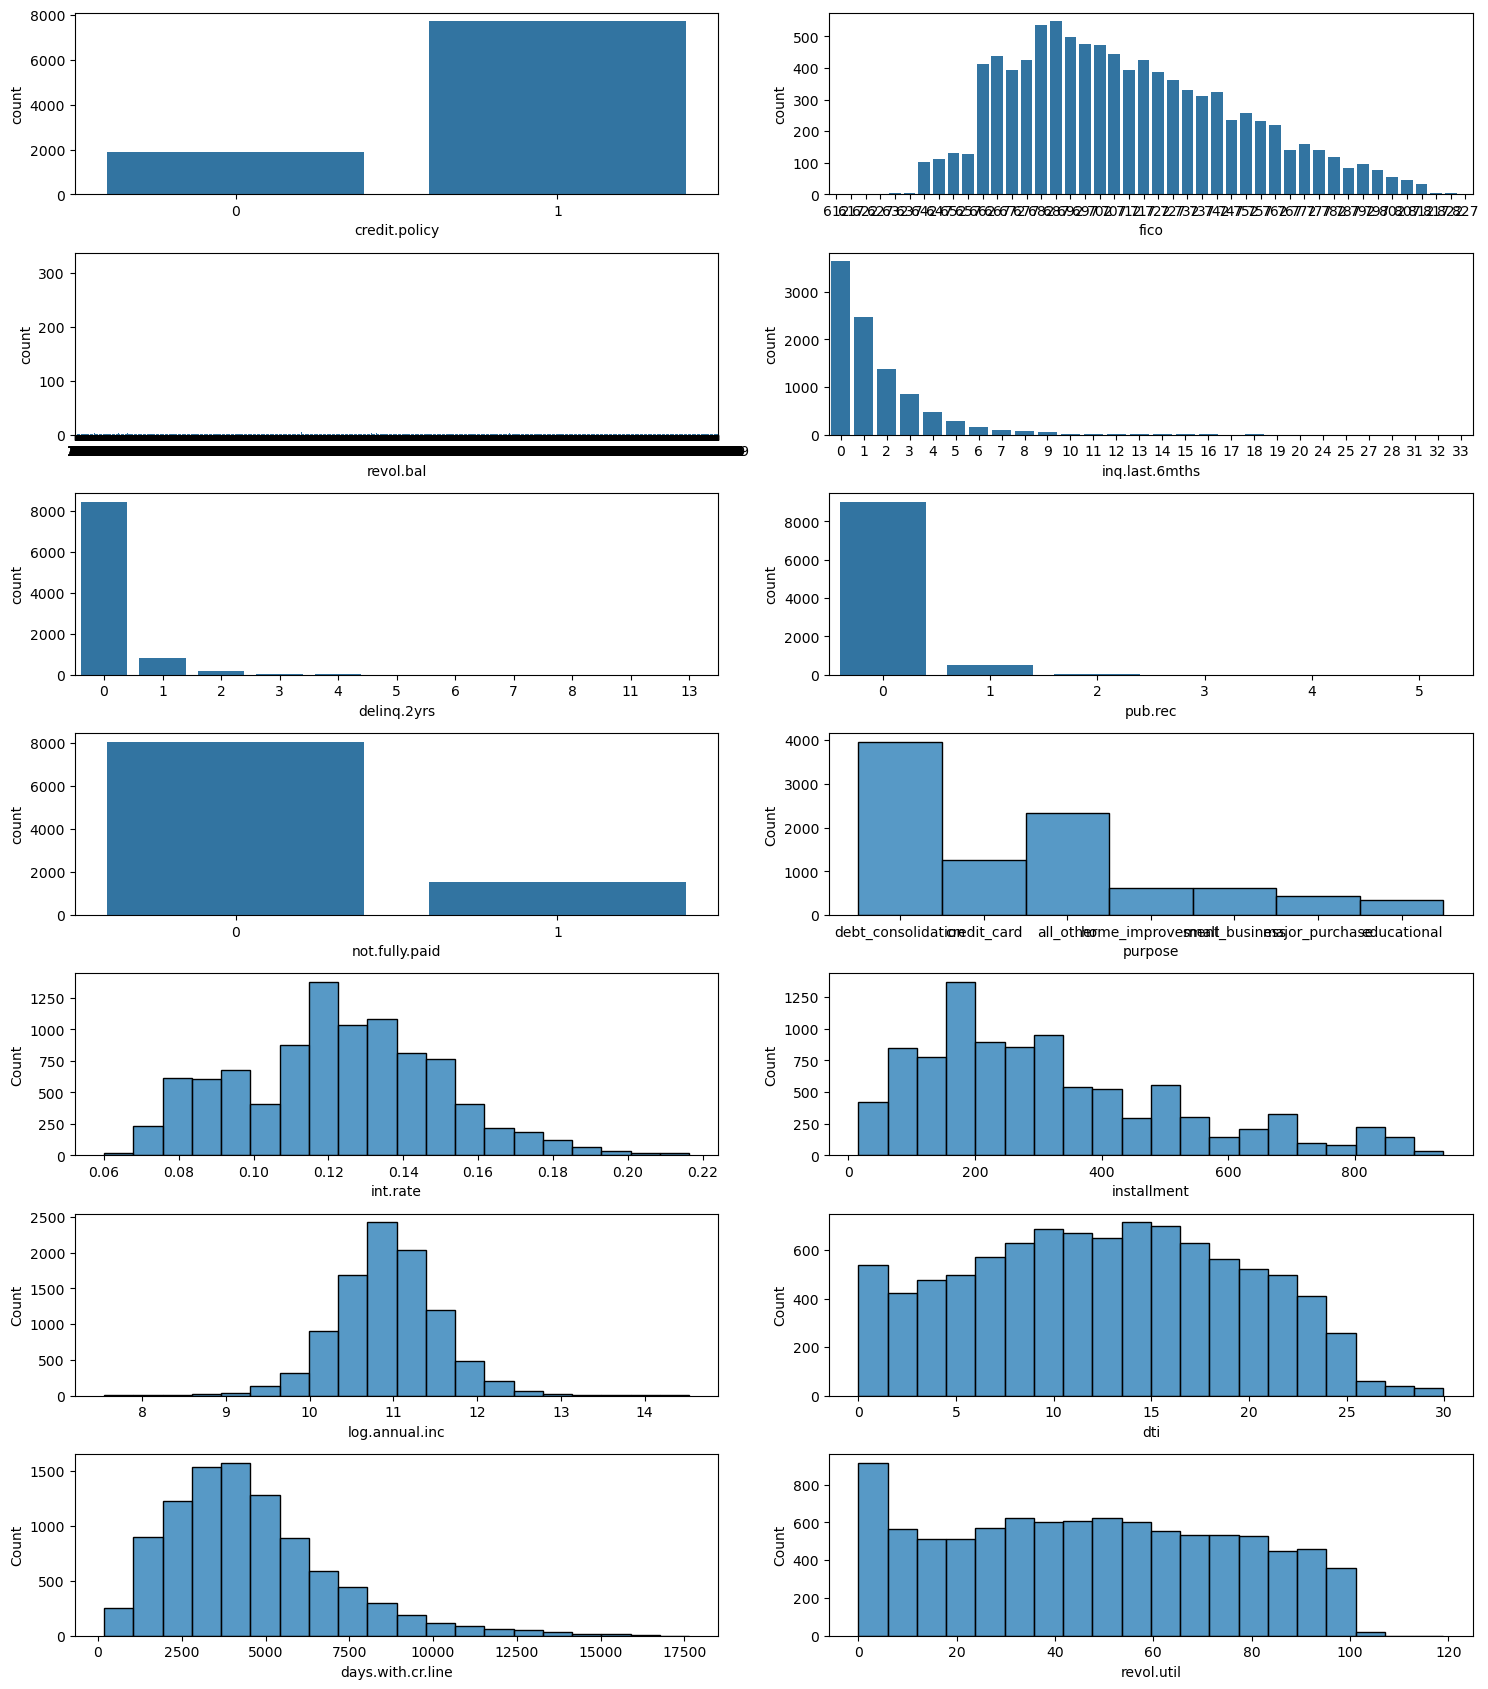

In [7]:
fig,ax = plt.subplots(7,2, figsize=(15,17))
ax = ax.flatten()   #para poder hacer ax[i] en vez de ax[i,j] porque el grafico se divide en más de una columna (4,2)    
cols_disc = loan_data.select_dtypes(include=['float64','object'])
cols_cont = loan_data.select_dtypes(include=['int64'])
i = 0
for col in cols_cont.columns:
    sns.countplot(data=loan_data, x=col, ax=ax[i], legend=None)
    #ax[i].set_title(col)
    i+=1
for col in cols_disc.columns:
    sns.histplot(data=loan_data, x=col, ax=ax[i], bins=20, legend=None)
    #ax[i].set_title(col)
    i+=1

plt.tight_layout()
plt.show()

<Axes: xlabel='interes_cat', ylabel='count'>

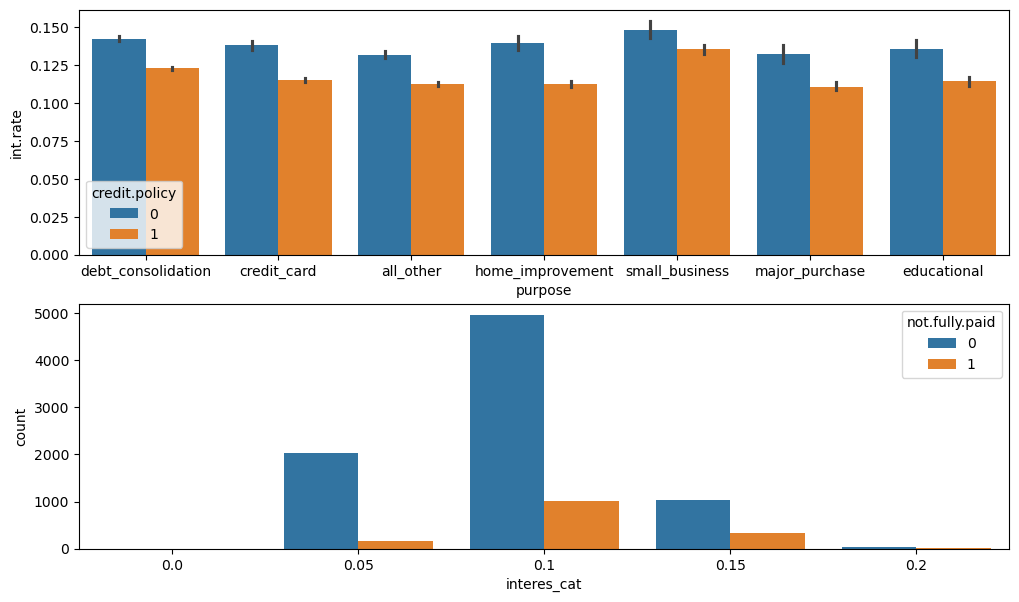

In [8]:
loan_data_copy['interes_cat'] = pd.cut(
    loan_data_copy['int.rate'],
    bins = [-1,0.05,0.1,0.15,0.2,np.inf],
    labels=[0,0.05,0.1,0.15,0.2])

fig, ax=plt.subplots(2,1,figsize=(12,7))
ax=ax.flatten()
sns.barplot(loan_data, x='purpose', y='int.rate',hue='credit.policy', ax=ax[0])
sns.countplot(data=loan_data_copy, x='interes_cat', hue='not.fully.paid', ax=ax[1])

In [9]:
loan_data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [10]:
# media cuotas mensuales por purpose
media_cuotas_razones = loan_data[['installment','purpose']].groupby('purpose').mean()
media_cuotas_razones=media_cuotas_razones.sort_values(by='purpose',ascending=False)
media_cuotas_razones

,installment
purpose,
small_business,433.826607
major_purchase,243.483913
home_improvement,337.071590
educational,217.547201
debt_consolidation,358.984390
credit_card,319.500713
all_other,244.937542


In [11]:
# media de interes por purpose
media_interes_razones = loan_data[['int.rate','purpose']].groupby('purpose').mean()
media_interes_razones=media_interes_razones.sort_values(by='purpose',ascending=False)
media_interes_razones

,int.rate
purpose,
small_business,0.138087
major_purchase,0.114171
home_improvement,0.117507
educational,0.119907
debt_consolidation,0.126595
credit_card,0.119738
all_other,0.116771


In [12]:
# media de retrasos segun si han pagado
media_retraso_pagado = loan_data[['delinq.2yrs','not.fully.paid']].groupby('not.fully.paid').mean()
media_retraso_pagado = media_retraso_pagado.sort_values(by='not.fully.paid',ascending=False)
media_retraso_pagado
# no me dice gran cosa

,delinq.2yrs
not.fully.paid,
1,0.174821
0,0.161591


In [13]:
# media de interes segun si han pagado
media_retraso_pagado = loan_data[['delinq.2yrs','not.fully.paid']].groupby('not.fully.paid').mean()
media_retraso_pagado = media_retraso_pagado.sort_values(by='not.fully.paid',ascending=False)
media_retraso_pagado

,delinq.2yrs
not.fully.paid,
1,0.174821
0,0.161591


In [14]:
corr_matrix = loan_data.corr(numeric_only=True)
corr_matrix["not.fully.paid"].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

In [15]:
corr_matrix["credit.policy"].sort_values(ascending=False)

credit.policy        1.000000
fico                 0.348319
days.with.cr.line    0.099026
installment          0.058770
log.annual.inc       0.034906
pub.rec             -0.054243
delinq.2yrs         -0.076318
dti                 -0.090901
revol.util          -0.104095
not.fully.paid      -0.158119
revol.bal           -0.187518
int.rate            -0.294089
inq.last.6mths      -0.535511
Name: credit.policy, dtype: float64

In [16]:
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


Conclusiones:
  - No veo nada que tenga mucha relacion con que hayan pagado(not.fully.paid). Las que mas tienen son si son aptos, el interes, visitas al acreedor y fico pero ninguno llega a 0.16
  - El fico tiene que ver para que uno sea apto
  - 
Estoy considerando borrar:
  - delinq.2yrs  (retrasos de 1 mes en 2 anios)
  - pub.rec (registros publicos despectivos)

#### DIVIDIR LOS DATOS

In [17]:
train_set, test_set = train_test_split(loan_data,
                            test_size=0.15, random_state=42,
                            stratify=loan_data['not.fully.paid'])

#### PREPARAR LOS DATOS

In [18]:
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Cosas que hacer:
- Rellenos:
  - Moda: not.fully.paid, credit.policy, purpose
  - Media: 'int.rate', 'installment', 'log.annual.inc', 'inq.last.6mths',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util'
       
- Transformaciones:
  - purpose: OneHotEncoder
- Borrar
  - 'pub.rec', 'not.fully.paid'

In [20]:
# imputers
imputer_moda = SimpleImputer(strategy="most_frequent")
imputer_media = SimpleImputer(strategy="mean")

# pipelines
num_pipeline = make_pipeline(imputer_media)
moda_pipeline = make_pipeline(imputer_moda)
purpose_pipeline = make_pipeline(
    imputer_moda,
     OneHotEncoder(handle_unknown="ignore")
)

#not.fully.paid, credit.policy, purpose
# megapipeline
pipeline = ColumnTransformer([
     ('int.rate', num_pipeline, ['int.rate']), 
     ('installment', num_pipeline, ['installment']), 
     ('log.annual.inc', num_pipeline, ['log.annual.inc']), 
     ('inq.last.6mths', num_pipeline, ['inq.last.6mths']), 
     ('dti', num_pipeline, ['dti']), 
     ('days.with.cr.line', num_pipeline, ['days.with.cr.line']), 
     ('revol.bal', num_pipeline, ['revol.bal']), 
     ('revol.util', num_pipeline, ['revol.util']), 
     ('not.fully.paid', moda_pipeline, ['not.fully.paid']), 
     ('credit.policy', moda_pipeline, ['credit.policy']), 
     ('purpose', purpose_pipeline, ['purpose'])
 ],
 remainder='drop',verbose_feature_names_out=False
 )


#meter los datos a la pipeline
test_set_prep = pipeline.fit_transform(test_set)
train_set_prep = pipeline.fit_transform(train_set)

#pasar los datos a dataframe
pipeline_column = pipeline.get_feature_names_out()   #nombres columnas
df_test_set = pd.DataFrame(test_set_prep, columns=pipeline_column)
df_train_set = pd.DataFrame(train_set_prep, columns=pipeline_column)
df_train_set.head()

,int.rate,installment,log.annual.inc,inq.last.6mths,dti,days.with.cr.line,revol.bal,revol.util,not.fully.paid,credit.policy,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1287,420.42,10.545341,0.0,10.39,3119.958333,12343.0,67.8,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1126,607.98,11.214466,0.0,8.73,3570.000000,19892.0,17.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.1347,576.69,10.962804,5.0,22.32,3359.958333,4583.0,73.9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.1114,328.04,9.980449,2.0,8.28,2031.958333,4328.0,10.3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1442,137.54,10.596635,7.0,22.32,7409.958333,12121.0,89.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

In [24]:
#separar conjunto entrenamiento 
train_y = df_train_set['not.fully.paid']
train_x = df_train_set.drop('not.fully.paid', axis=1)

#separar conjunto prueba 
test_y = df_test_set['not.fully.paid']
test_x = df_test_set.drop('not.fully.paid', axis=1)
# train_x

,int.rate,installment,log.annual.inc,inq.last.6mths,dti,days.with.cr.line,revol.bal,revol.util,credit.policy,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1287,420.42,10.545341,0.0,10.39,3119.958333,12343.0,67.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1126,607.98,11.214466,0.0,8.73,3570.000000,19892.0,17.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.1347,576.69,10.962804,5.0,22.32,3359.958333,4583.0,73.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.1114,328.04,9.980449,2.0,8.28,2031.958333,4328.0,10.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1442,137.54,10.596635,7.0,22.32,7409.958333,12121.0,89.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8136,0.1114,492.06,11.097410,2.0,13.98,7260.000000,17312.0,68.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8137,0.0768,249.53,10.819778,2.0,11.59,2130.000000,9287.0,27.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8138,0.1261,820.91,11.695247,3.0,5.76,2141.041667,23908.0,62.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8139,0.1426,543.75,10.819778,3.0,22.66,2369.958333,16643.0,63.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [57]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [58]:
# Cargar los datos
data = pd.read_csv("Datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

FileNotFoundError: [Errno 2] No such file or directory: 'Datos/tmdb_5000_movies.csv'

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)


In [ ]:
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?